<a href="https://colab.research.google.com/github/light3w3/ml_final/blob/main/show_dataset_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. 필수 라이브러리 설치
!pip install librosa matplotlib seaborn --quiet

In [ ]:
# 2. 라이브러리 임포트
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
test_audio_path = '/content/drive/MyDrive/기계학습(Deepwave)/데이터 셋/2501ml_data/test'
test_label_path = '/content/drive/MyDrive/기계학습(Deepwave)/데이터 셋/2501ml_data/label/test_label.txt'

In [ ]:
with open(test_label_path, 'r') as f:
  lines = f.readlines()

In [ ]:
data = []
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 5:
        speaker_id = parts[0]  # 예: KSI
        filename = parts[1]  # 예: KDF_E_0166.wav
        label = parts[-1]    # 예: Real or Fake
        data.append((filename, label,speaker_id))
df = pd.DataFrame(data, columns=['filename', 'label', 'speaker_id'])
df.head()

,filename,label,speaker_id
0,KDF_E_1004.wav,Real,YSG
1,KDF_E_0510.wav,Real,YSG
2,KDF_E_1538.wav,Real,YSG
3,KDF_E_0370.wav,Real,YSG
4,KDF_E_1048.wav,Real,YSG


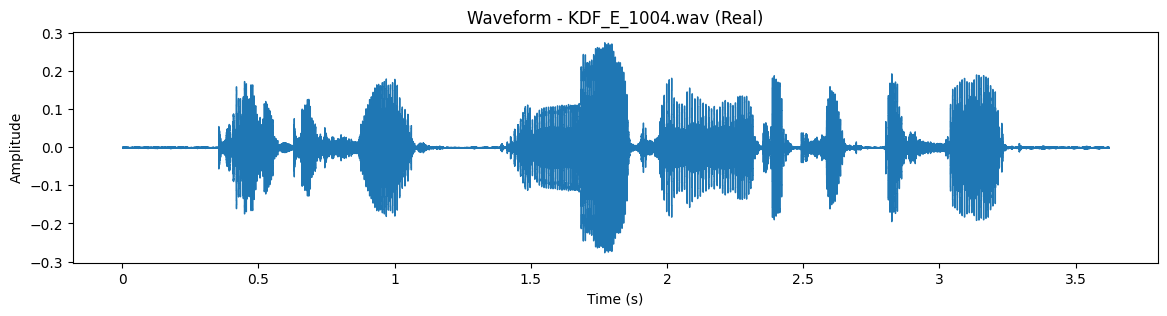

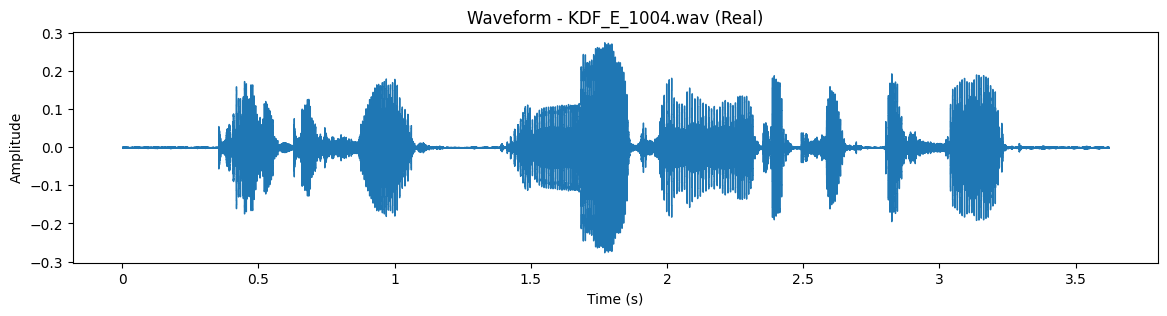

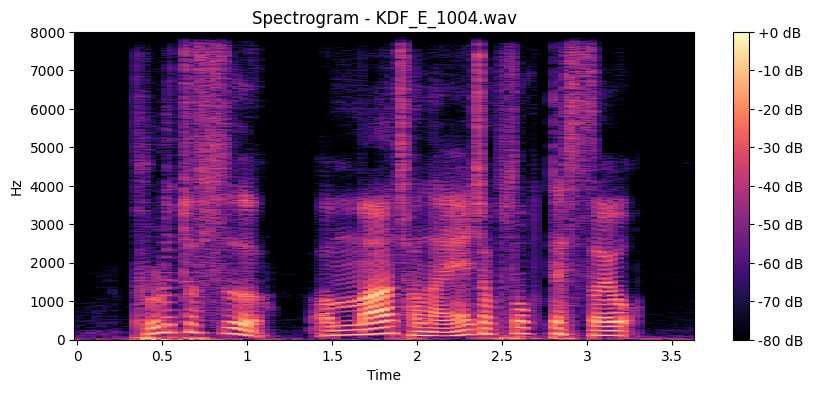

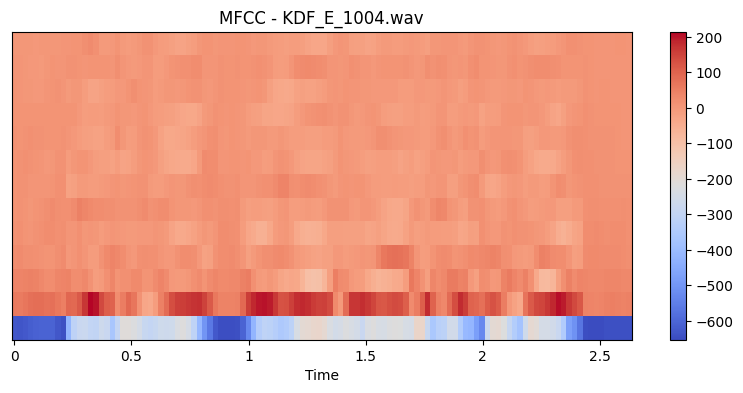

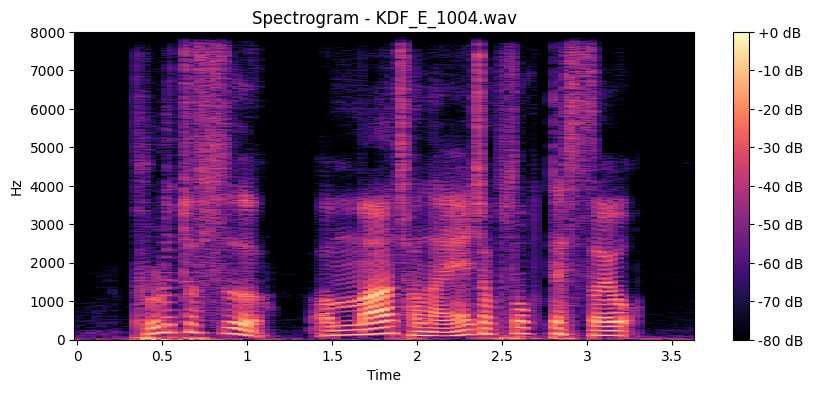

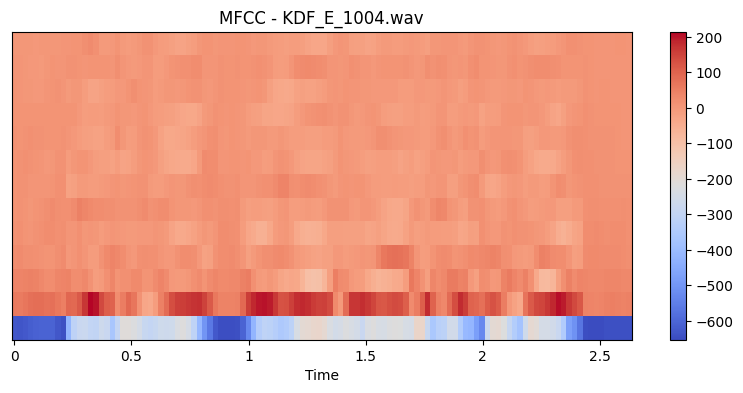

In [ ]:
# 시각화할 예제 선택
sample = df.iloc[0]
filename = sample['filename']
file_path = os.path.join(test_audio_path, filename)

# 오디오 로드
y, sr = librosa.load(file_path, sr=16000)

# Plot: Waveform
plt.figure(figsize=(14, 3))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform - {filename} ({sample['label']})")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()# 🔹 시각화할 오디오 샘플 선택 (데이터프레임의 첫 번째 샘플)
sample = df.iloc[0]
filename = sample['filename']  # 오디오 파일 이름
file_path = os.path.join(test_audio_path, filename)  # 전체 경로 구성

# 🔹 오디오 파일 로드 (librosa를 이용해 16kHz로 로드)
y, sr = librosa.load(file_path, sr=16000)  # y: 오디오 신호(1D), sr: 샘플링레이트

# 🔸 1. Waveform(파형) 시각화
plt.figure(figsize=(14, 3))  # 그래프 크기 설정
librosa.display.waveshow(y, sr=sr)  # 시간축으로 파형 시각화
plt.title(f"Waveform - {filename} ({sample['label']})")  # 제목에 라벨 포함
plt.xlabel("Time (s)")  # X축: 시간
plt.ylabel("Amplitude")  # Y축: 진폭
plt.show()

# 🔸 2. Spectrogram(스펙트로그램) 시각화
plt.figure(figsize=(10, 4))  # 그래프 크기 설정
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)  # STFT 후 dB scale로 변환
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')  # 시간-주파수 그래프
plt.colorbar(format="%+2.0f dB")  # 색상바: 데시벨 값
plt.title(f"Spectrogram - {filename}")  # 그래프 제목
plt.show()

# 🔸 3. MFCC(Mel Frequency Cepstral Coefficients) 시각화
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # MFCC 13차원 특징 추출
plt.figure(figsize=(10, 4))  # 그래프 크기 설정
librosa.display.specshow(mfccs, x_axis='time')  # 시간-계수 그래프
plt.colorbar()  # 색상바: 계수 값
plt.title(f"MFCC - {filename}")  # 그래프 제목
plt.show()

# Plot: Spectrogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.0f dB")
plt.title(f"Spectrogram - {filename}")
plt.show()

# Plot: MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title(f"MFCC - {filename}")
plt.show()


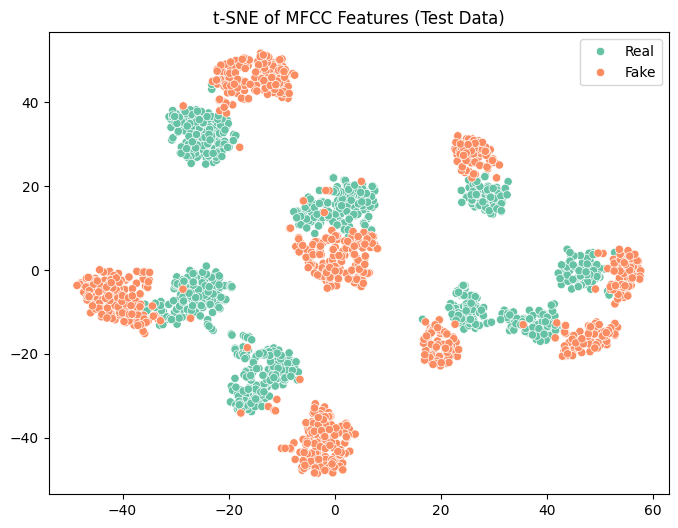

In [ ]:
mfcc_list = []  # 각 음성 샘플의 MFCC 평균 벡터를 저장할 리스트
labels = []     # 각 샘플의 라벨 (0: Real, 1: Fake)

# 🔹 지정된 범위의 오디오 샘플을 순회하며 특징 추출 (Colab 성능 고려해 400개만)
for i in range(2000):
    filename = df.iloc[i]['filename']          # 파일 이름
    label = df.iloc[i]['label']                # 정답 라벨
    file_path = os.path.join(test_audio_path, filename)  # 오디오 파일 전체 경로

    try:
        # 🔸 오디오 파일 로드 (샘플링 주파수 16kHz)
        y, sr = librosa.load(file_path, sr=16000)

        # 🔸 MFCC 특징 추출 (13차원 계수)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        # 🔸 시간 축을 따라 평균을 취해 1D 벡터로 압축 (각 샘플 → (13,) 벡터)
        mfcc_mean = np.mean(mfcc, axis=1)

        # 🔸 결과 저장
        mfcc_list.append(mfcc_mean)
        labels.append(label)
    except Exception as e:
        # 🔸 오류 발생 시 파일 이름과 함께 출력
        print(f"Error processing {filename}: {e}")

# 🔹 차원 축소 전: 표준화 (평균 0, 분산 1로 스케일링)
X = StandardScaler().fit_transform(mfcc_list)

# 🔹 t-SNE 수행 (고차원 특징을 2D로 축소)
# n_components=2: 2차원 출력
# perplexity=30: 이웃 샘플 고려 수
# random_state: 랜덤성 고정
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X)

# 🔹 시각화 (2D t-SNE 결과)
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=labels, palette='Set2')  # 클래스별 색상 지정
plt.title("t-SNE of MFCC Features (Test Data)")  # 제목 표시
plt.show()

In [ ]:
labels

['Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 